# Artificial RNN (LSTM) to predict the closing stock price of a corporation of the past 60 days

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get the Stock quote
data_frame = web.DataReader('AAPL', data_source='yahoo', start ='2010-01-01', end='2022-01-10')
# Show data
data_frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482608
...,...,...,...,...,...,...
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.471344
2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.697418
2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.781143


Text(0, 0.5, 'Closing Price USD')

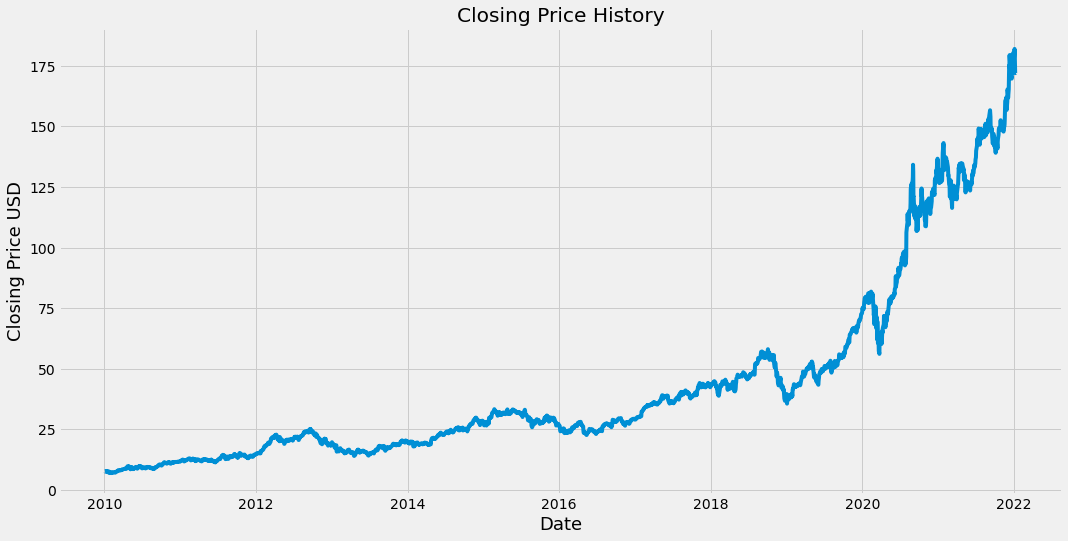

In [3]:
# Visualize the closing price history of AAPL
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(data_frame['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD', fontsize=18)

In [4]:
# Create a data frame with the close column only
data = data_frame.filter(['Close'])
#Convert to Numpy array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

2422

In [5]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) # Values will be 0-1 inclusive
scaled_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.94284937],
       [0.94381995],
       [0.94393416]])

In [6]:
# Create Trainig dataset
# Scaled Training Data
train_data = scaled_data[0:training_data_len, :] # returns all the colums
#train_data = dataset[0:training_data_len, :]
# Split data
x_train = []
y_train = []

for i in range(30, len(train_data) - 5):
    # Jeweils einzeln scalieren pro Datensatz
    x_train.append(train_data[i-30:i, 0]) # first iteration 0-60 exclusive and so on
    y_train.append(train_data[i+5, 0])

In [7]:
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(2387, 30)

In [8]:
# Reshape data (ltsm expects 3D in the form: number of samples, number of time steps, number of features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
# Build LSTM Model
model = Sequential()
# 50 neurons, True because there will be another LSTM layer, time_steps = 60, features = 1
model.add(LSTM(30, return_sequences=True, input_shape = (x_train.shape[1], 1)))
#model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-04-05 16:21:32.204680: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-05 16:21:32.204823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [10]:
# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs = 2) 

2022-04-05 16:21:32.737802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-05 16:21:32.738319: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/2


2022-04-05 16:21:42.534872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-05 16:21:42.686681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-05 16:21:43.022410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-05 16:21:43.471864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-05 16:21:44.156060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2387/2387 [==============================] - 144s 56ms/step - loss: 3.2824e-04
Epoch 2/2
2387/2387 [==============================] - 140s 58ms/step - loss: 1.2384e-04


In [12]:
# Create testing data set
# Create a new array containing scaled values from index 1960 to 2525
test_data = scaled_data[training_data_len - 30: , :]
#test_data = dataset[training_data_len - 30: , :]
# Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    

In [13]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [14]:
# Reshape to 3D
# number of rows is the number of samples we have, number of colums is the number of time steps, features
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
# Get the model's predicted price values
predictions = model.predict(x_test) # same data as in y_test once inverse transformed
predictions = scaler.inverse_transform(predictions) # sort of unscaling the values

2022-04-05 16:26:17.079530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-05 16:26:17.132902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-05 16:26:17.341739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [16]:
# Evaluate model by getting the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse # the lower the rmse the better the model

7.1663268286334585

/var/folders/2v/08tsvr012r9cy229qthszhr40000gn/T/ipykernel_81922/806320988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


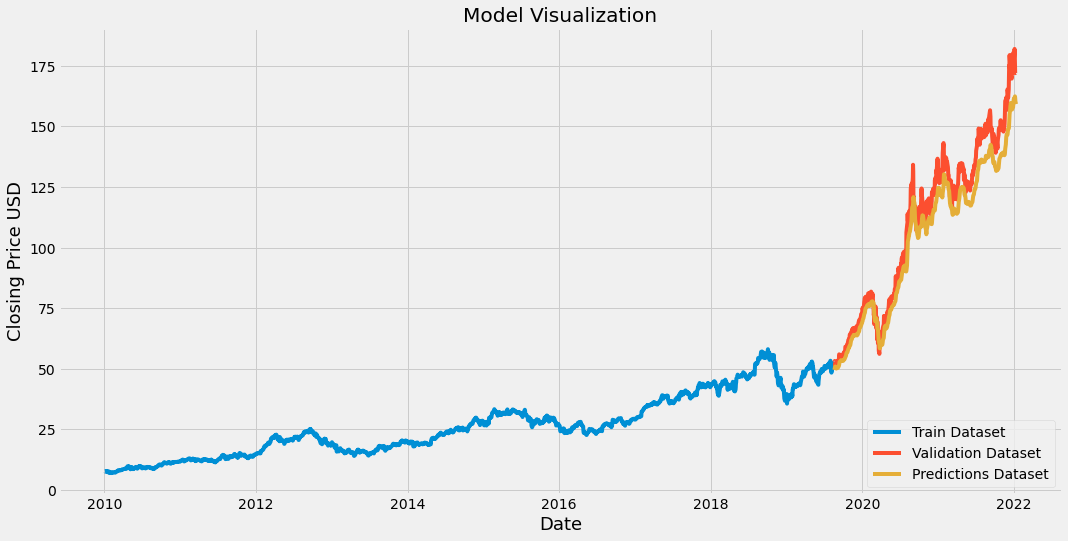

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize 
plt.figure(figsize = (16,8))
plt.title('Model Visualization')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train Dataset', 'Validation Dataset', 'Predictions Dataset'], loc = 'lower right')
plt.show()

In [18]:
# Show the valid and predicted prices of AAPL Stock
valid

,Close,Predictions
Date,,
2019-08-19,52.587502,49.474689
2019-08-20,52.590000,49.818310
2019-08-21,53.160000,50.172707
2019-08-22,53.115002,50.563099
2019-08-23,50.660000,50.885830
...,...,...
2022-01-04,179.699997,162.152679
2022-01-05,174.919998,162.432602
2022-01-06,172.000000,161.765610


In [19]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start ='2010-01-01', end='2022-01-10')
# Create a new data frame
new_data_frame = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and converrt the data frame to an array
last_60_days = new_data_frame[-30:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days 
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price 
predicted_price_scale = model.predict(X_test)
# Undo scaling 
predicted_price = scaler.inverse_transform(predicted_price_scale)
print('The predicted price is:', predicted_price) # Predicted closing price 2022-01-11

The predicted price is: [[158.28362]]


In [20]:
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start ='2022-01-11', end='2022-01-11')
actual_value = apple_quote2['Close']
print('The actual closing price was', actual_value[0])

The actual closing price was 175.0800018310547


## 